In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', 100)

In [3]:
train = pd.read_csv('train.csv')
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
0,b4d8a653ea,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,-0.688706,7e5c97705a,e5df3eff9b,91bb549494,e33c63cf35,3694.0,6e40247e69,617a4ad3f9,718c61545b,c26d08129a,634e3cf3ac,dd9c9e0da2,17c99905b6,513a3e3f36,9aba4d7f51,40.579612,-0.112693,-0.172191,1.166667,1.674538,0.630889,37.000000,1.294922,55.0,0.166667,10.0,0.0,0.000000,1.0,9.0,0.0,1.0,23.0,3.67,0.12,1.935,2.2,0.625,0.250,0.125,0.000,0.813,0.074,0.634,0.548,0.235333,0.264952,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,9.0,2
1,467f9617a3,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.870871,5624b8f759,fa0b797a92,669ea3d319,f178803074,18156.0,01ede04b4b,617a4ad3f9,718c61545b,d342e2765f,bb20e1ca06,8a6c8cef83,1b02793146,992153ed65,9aba4d7f51,28.765503,2.612285,2.159091,4.000000,1.710714,1.713538,0.166667,0.027669,109.0,0.000000,31.0,0.0,0.000000,1.0,244.0,1.0,1.0,68.0,17.25,0.57,3.452,4.0,0.409,0.619,0.579,0.248,0.346,0.541,0.522,0.000,1.782346,1.322409,0.011647,0.397671,0.239601,0.249584,0.068220,0.033278,601.0,4
2,190436e528,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.437655,5624b8f759,152af2cb2f,91bb549494,e33c63cf35,1178.0,cc69cbe29a,617a4ad3f9,e8a040423a,c82c3dbd33,ee3501282b,199ce7c484,5f17dedd5c,5c5025bd0a,9aba4d7f51,24.943933,-0.814660,-0.708308,1.500000,-0.512422,-0.733967,0.333333,14.837728,11.0,0.000000,24.0,0.0,0.000000,1.0,29.0,0.0,3.0,11.0,4.42,0.15,0.161,0.2,1.000,1.000,1.000,1.000,1.000,0.520,0.533,0.835,-0.586540,0.672436,0.000000,0.606061,0.121212,0.212121,0.060606,0.000000,33.0,3
3,43859085bc,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,0.004439,f67f142e40,c4dd2197c3,91bb549494,e33c63cf35,14559.0,6e40247e69,617a4ad3f9,718c61545b,c26d08129a,9e166b965d,466f8951b0,fde72a6d5c,acfadc5c01,9aba4d7f51,41.576860,-0.907833,-0.761736,0.500000,-0.627525,-0.805801,1.166667,0.004395,0.0,0.500000,0.0,0.0,0.000000,7.0,7.0,0.0,3.0,15.0,8.92,0.29,0.226,0.8,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,-1.600326,-1.838680,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,4
4,a4c3095b75,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.480977,7e5c97705a,e071d01df5,91bb549494,e33c63cf35,5777.0,6e40247e69,617a4ad3f9,4b9480aa42,e84655292c,527b6ca8cc,dd9c9e0da2,17c99905b6,0fc56ea1f0,9aba4d7f51,31.080282,-0.371787,-0.367616,1.666667,0.271307,0.013112,17.333333,1713.439128,33.0,0.000000,6.0,1.0,0.666667,8.0,108.0,1.0,4.0,86.0,1.58,0.05,2.032,2.4,0.348,0.762,0.550,0.392,0.489,0.517,1.000,0.642,0.960991,0.790990,0.020161,0.645161,0.258065,0.036290,0.040323,0.000000,248.0,3


# Build a quick baseline

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Create a copy to work with
X = train.copy()

# Save and drop labels
y = train.y
X = X.drop('y', axis=1)

# fill NANs 
X = X.fillna(-999)

# Label encoder
for c in train.columns[train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

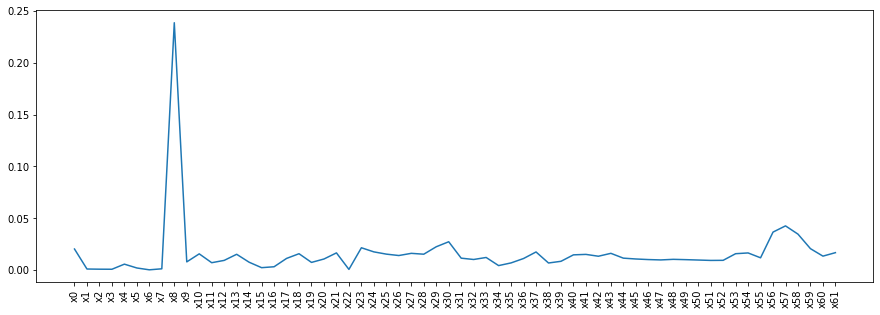

In [13]:
plt.figure(figsize=(15,5))
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

There is something interesting about x8.

In [19]:
# we see it was standard scaled, most likely, if we concat train and test, we will get exact mean=1, and std 1 
print('Mean:' , train.x8.mean())
print('std:' , train.x8.std())

Mean: -0.0002523520286219452
std: 1.0232816360125667


In [20]:
# And we see that it has a lot of repeated values
train.x8.value_counts().head(15)

-2.984750    2770
 0.480977    2569
 0.610941    1828
 0.654263    1759
 0.567620    1746
 0.697585    1691
 0.524298    1639
 0.740906    1628
 0.394333    1610
 0.437655    1513
 0.351012    1450
 0.264369    1429
 0.307690    1401
 0.221047    1372
 0.784228    1293
Name: x8, dtype: int64

In [21]:
# It's very hard to work with scaled feature, so let's try to scale them back
# Let's first take a look at difference between neighbouring values in x8

x8_unique = train.x8.unique()
x8_unique_sorted = np.sort(x8_unique)
                           
np.diff(x8_unique_sorted)

array([43.27826527, 38.98942817,  0.21660793,  0.04332159,  0.17328635,
        0.21660793,  0.08664317,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04

In [22]:
# The most of the diffs are 0.04332159! 
# The data is scaled, so we don't know what was the diff value for the original feature
# But let's assume it was 1.0
# Let's devide all the numbers by 0.04332159 to get the right scaling
# note, that feature will still have zero mean

np.diff(x8_unique_sorted/0.04332159)

array([998.99992752, 899.9999347 ,   4.99999964,   0.99999993,
         3.99999971,   4.99999964,   1.99999985,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99

In [23]:
(train.x8/0.04332159).head(10)

0   -15.897530
1    20.102468
2    10.102468
3     0.102469
4    11.102468
5   -68.897526
6    10.102468
7    15.102468
8     9.102468
9   -68.897526
Name: x8, dtype: float64

In [24]:
# Ok, now we see .102468 in every value
# this looks like a part of a mean that was subtracted during standard scaling
# If we subtract it, the values become almost integers
(train.x8/0.04332159 - .102468).head(10)

0   -15.999998
1    20.000000
2    10.000000
3     0.000001
4    11.000000
5   -68.999994
6    10.000000
7    15.000000
8     9.000000
9   -68.999994
Name: x8, dtype: float64

In [25]:
# let's round them 
x8_int = (train.x8/0.04332159 - .102468).round()
x8_int.head(10)

0   -16.0
1    20.0
2    10.0
3     0.0
4    11.0
5   -69.0
6    10.0
7    15.0
8     9.0
9   -69.0
Name: x8, dtype: float64

In [26]:
# Ok, what's next? In fact it is not obvious how to find shift parameter, 
# and how to understand what the data this feature actually store
# But ...

In [27]:
x8_int.value_counts()

-69.0    2770
 11.0    2569
 14.0    1828
 15.0    1759
 13.0    1746
         ... 
 42.0       1
-63.0       1
-48.0       1
-64.0       1
 35.0       1
Name: x8, Length: 99, dtype: int64

In [28]:
# do you see this -1968? Doesn't it look like a year? ... So my hypothesis is that this feature is a year of birth! 
# Maybe it was a textbox where users enter their year of birth, and someone entered 0000 instead
# The hypothesis looks plausible, isn't it?

In [29]:
(x8_int + 1968.0).value_counts().sort_index()

0.0          1
999.0        4
1899.0    2770
1904.0       1
1905.0       1
          ... 
2005.0       2
2010.0       1
2037.0       1
2038.0       1
2047.0       1
Name: x8, Length: 99, dtype: int64

In [30]:
# After the competition ended the organisers told it was really a year of birth